In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from pyinterpolate.kriging.kriging import Krige
from pyinterpolate.kriging.semivariance import calculate_semivariance

In [4]:
signal = np.fromfile('data/aami3a.dat', dtype=float)[:720]
signal = (signal / np.max(signal)) * 255
time_array = np.arange(start=0, stop=1, step=1/len(signal))

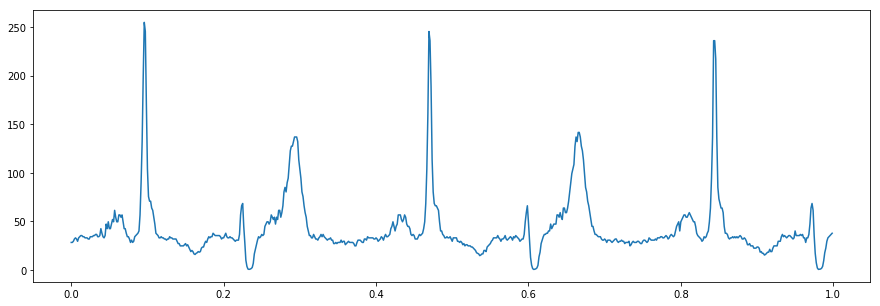

In [5]:
plt.figure(figsize=(15,5))
plt.plot(time_array, signal)

In [6]:
def remove_random_points(signal, probability=0.2):
    for idx, s in enumerate(signal):
        random_check = np.random.rand()
        if probability > random_check:
            signal[idx] = -999
    return signal
        
signal_with_holes = remove_random_points(signal)

In [6]:
number_of_nans = abs(signal_with_holes[signal_with_holes == -999].sum()) / 999
print('Number of -999: {}. Percent of -999: {}'.format(
    number_of_nans, number_of_nans / len(signal_with_holes)
))

Number of -999: 168.0. Percent of -999: 0.23333333333333334


In [7]:
# Data preparation: only existing values and their distances

known_signal = np.array([time_array, signal_with_holes]).T


In [8]:
known_signal = known_signal[np.all(known_signal >= 0, axis=1)]

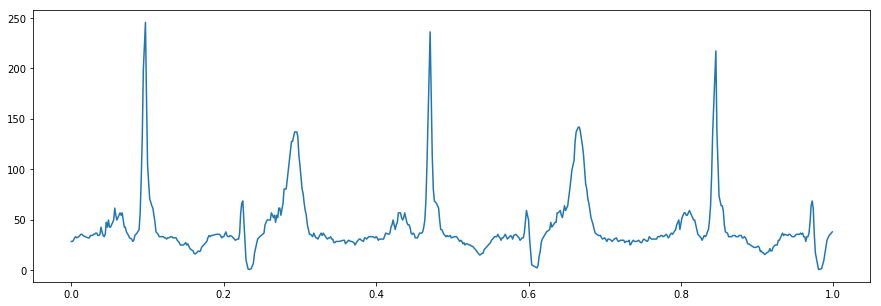

In [9]:
plt.figure(figsize=(15,5))
plt.plot(known_signal[:, 0], known_signal[:, 1])

In [10]:
bins = 0.01
ar_lags = np.arange(0, 1, 0.001)

smv = calculate_semivariance(known_signal, ar_lags, bins)

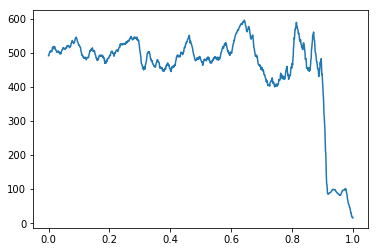

In [15]:
plt.plot(smv[0], smv[1])